In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/minimization/"
print("data path: ", data_path)

level: level2 & tutorial name: nanosheared-electrolyte
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/nanosheared-electrolyte/minimization/


In [3]:
log = lammps_logfile.File(data_path + "log.lammps")
timestep = 0.5
Time_0 = log.get("Step", run_num=0)*timestep
TotEng_0 = log.get("TotEng", run_num=0)
timestep = 1.0
Time_1 = log.get("Step", run_num=1)*timestep
TotEng_1 = log.get("TotEng", run_num=1)
Time_2 = log.get("Step", run_num=2)*timestep
TotEng_2 = log.get("TotEng", run_num=2)
Time_0 /= 1000 # ps
Time_1 /= 1000 # ps
Time_2 /= 1000 # ps
Time_1 -= 2
Time_2 -= 2

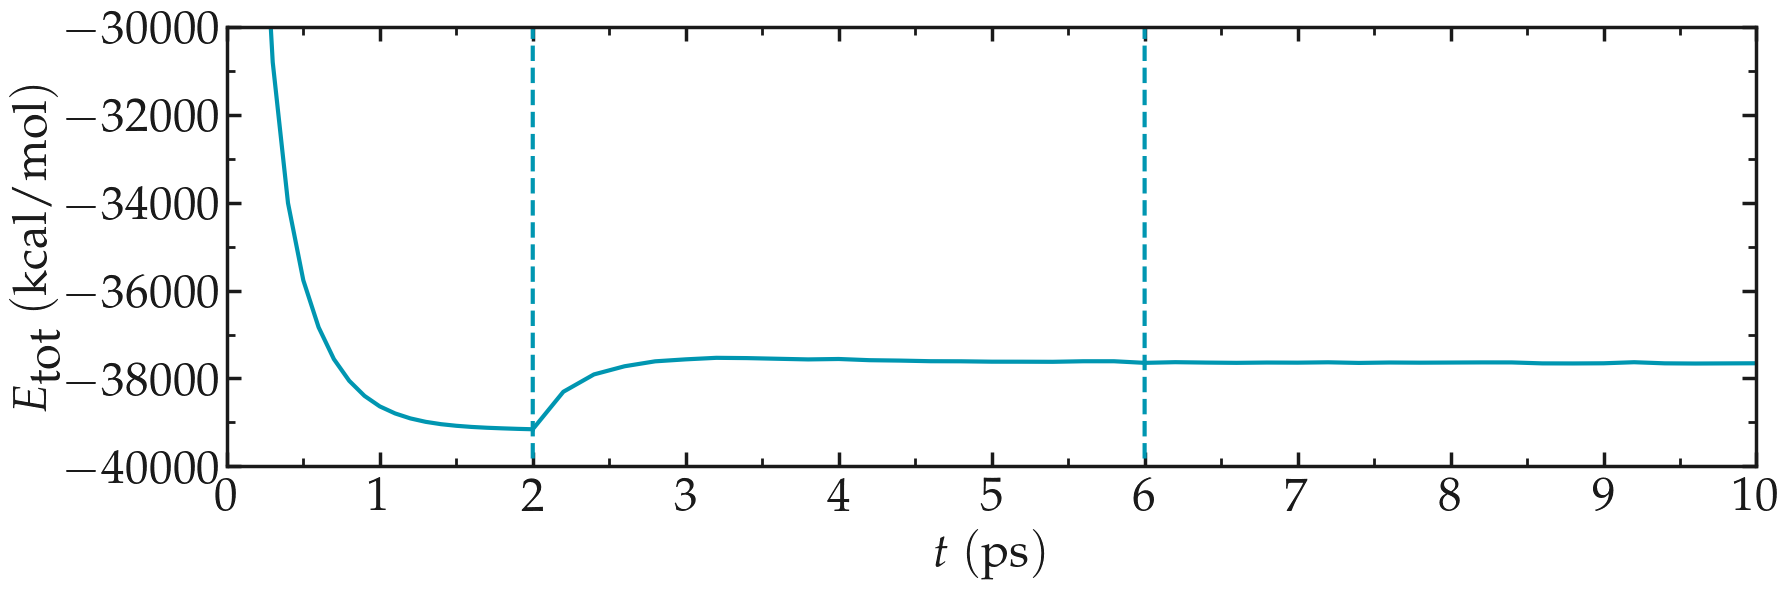

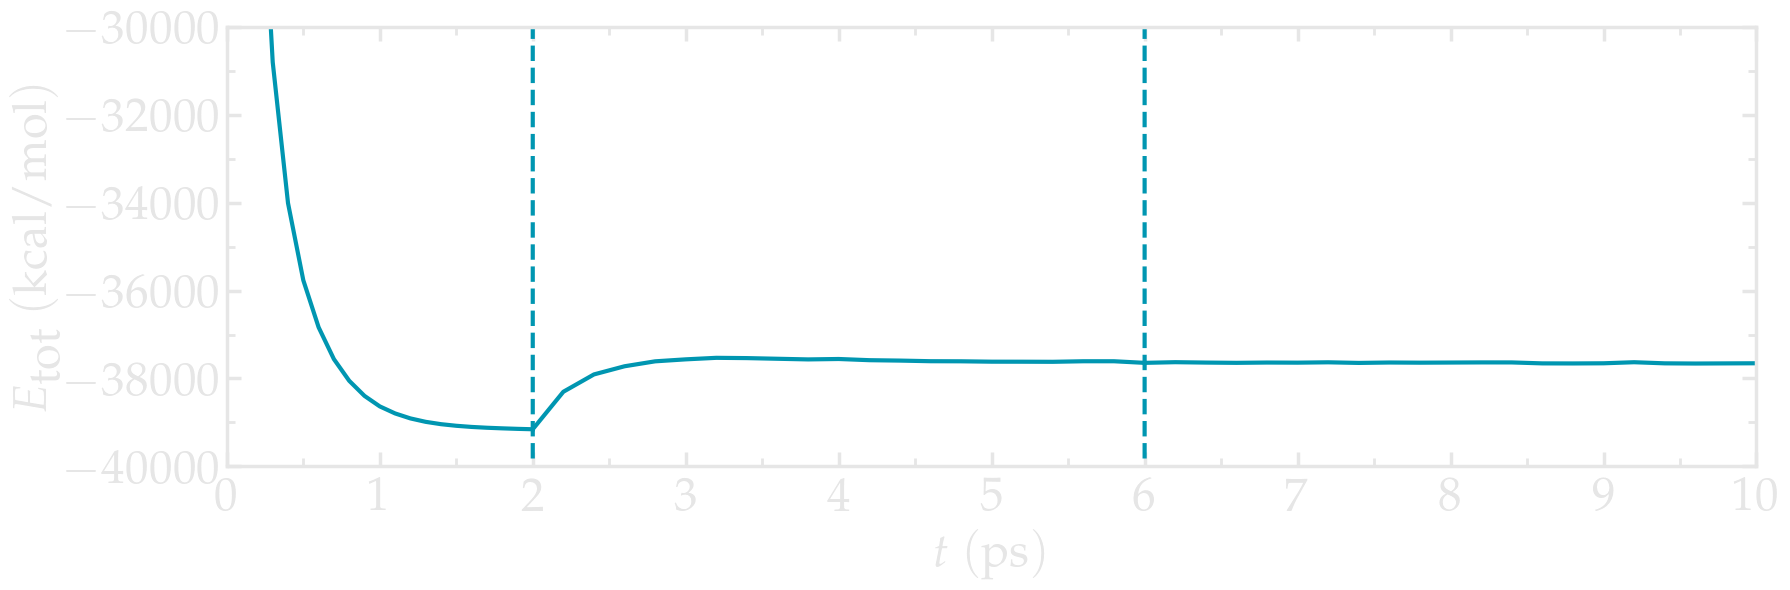

In [4]:
filename = "minimization"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.arange(-45000, -20000, 10)
    ax[-1].plot(x*0+2, x, '--', color=colors["myblue"], linewidth=3)
    ax[-1].plot(x*0+6, x, '--', color=colors["myblue"], linewidth=3)
    ax[-1].plot(Time_0, TotEng_0, color=colors["myblue"], linewidth=3)
    ax[-1].plot(Time_1, TotEng_1, color=colors["myblue"], linewidth=3)
    ax[-1].plot(Time_2, TotEng_2, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$', r'$E_\textrm{tot} ~ \mathrm{(kcal/mol)}$',
                    legend=False, axis_color=mygray, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(0, 10.1, 1), x_boundaries=(0, 10),
                   y_ticks=np.arange(-40000, -29000, 2000), y_boundaries=(-40000, -30000))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

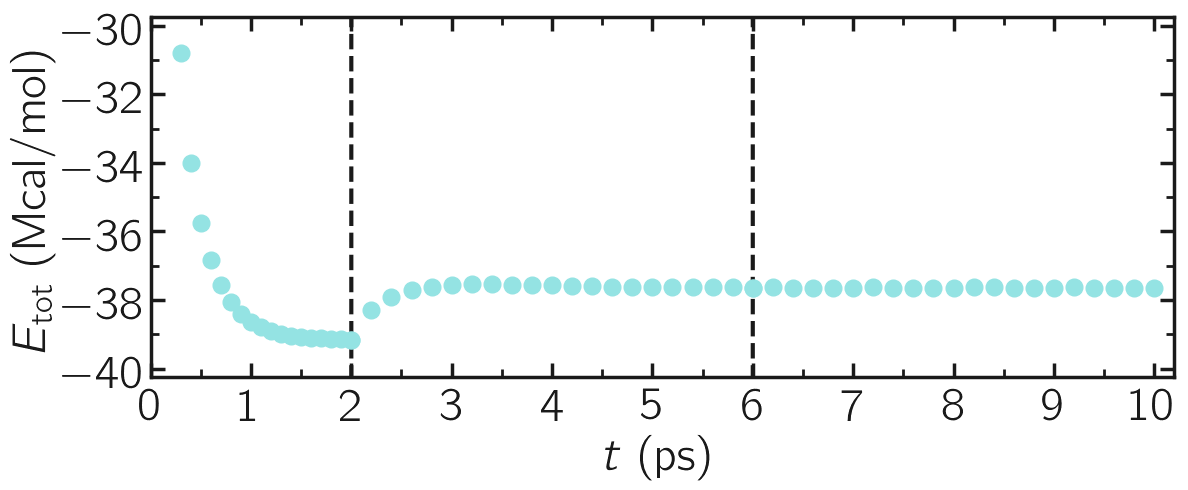

In [5]:
filename = "minimization-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,5), serif=False)
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
x = np.arange(-45000, -20000, 10)
ax[-1].plot(x*0+2, x/1000, '--', color=colors["mylightgray"], linewidth=3)
ax[-1].plot(x*0+6, x/1000, '--', color=colors["mylightgray"], linewidth=3)
ax[-1].plot(Time_0, TotEng_0/1000, 'o', color=colors["unisoncyan"], linewidth=3, markersize=12)
ax[-1].plot(Time_1, TotEng_1/1000, 'o', color=colors["unisoncyan"], linewidth=3, markersize=12)
ax[-1].plot(Time_2, TotEng_2/1000, 'o', color=colors["unisoncyan"], linewidth=3, markersize=12)
complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$', r'$E_\mathrm{tot} ~ \mathrm{(Mcal/mol)}$',
                legend=False, axis_color=mygray, xpad=8)
set_boundaries(plt, x_ticks=np.arange(0, 10.1, 1), x_boundaries=(0, 10.2),
                y_ticks=np.arange(-40, -29, 2), y_boundaries=(-40.250, -29.750))
#add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)